In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\sreer\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\sreer\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\sreer\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\sreer\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\sreer\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\sreer\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found

In [19]:
df = pd.read_csv("../csv_metrics.csv")
df.head()

,algorithm_name,total_distance,total_nodes,satisfaction_percentage
0,Direct Matching,2.129018e+06,1000,80.400000
1,Optimized Direct Matching,8.629656e+05,1000,83.000000
2,YouSupply,5.794360e+05,1000,69.739292
3,ODM + YouSupply,3.740647e+05,325,65.230769
4,Genetic Algorithm,4.679698e+05,1074,73.046532


In [20]:
df["avg_distance_per_node"] = df["total_distance"] / df["total_nodes"]
df.head()

,algorithm_name,total_distance,total_nodes,satisfaction_percentage,avg_distance_per_node
0,Direct Matching,2.129018e+06,1000,80.400000,2129.017780
1,Optimized Direct Matching,8.629656e+05,1000,83.000000,862.965619
2,YouSupply,5.794360e+05,1000,69.739292,579.436021
3,ODM + YouSupply,3.740647e+05,325,65.230769,1150.968386
4,Genetic Algorithm,4.679698e+05,1074,73.046532,435.726036


In [23]:
df

,algorithm_name,total_distance,total_nodes,satisfaction_percentage,avg_distance_per_node
0,Direct Matching,2.129018e+06,1000,80.400000,2129.017780
1,Optimized Direct Matching,8.629656e+05,1000,83.000000,862.965619
2,YouSupply,5.794360e+05,1000,69.739292,579.436021
3,ODM + YouSupply,3.740647e+05,325,65.230769,1150.968386
4,Genetic Algorithm,4.679698e+05,1074,73.046532,435.726036
5,Direct Matching,2.149317e+06,1000,82.000000,2149.316786
6,Optimized Direct Matching,8.178039e+05,1000,87.000000,817.803874
7,YouSupply,6.173622e+05,1000,73.179724,617.362211
8,ODM + YouSupply,3.332246e+05,291,66.666667,1145.101707
9,Genetic Algorithm,4.807741e+05,1085,73.006135,443.109758


In [21]:
def pipeline(rows,name):
    '''
        Assumes a bunch of rows are done in a particular order
            1. First algorithm runs on a simulation
            2. Next algorithm runs on a new simulation of all the unsatisfied nodes from previous algorithm
            3. Continue till all rows are added together
    '''
    total_nodes = df.iloc[rows[0]]["total_nodes"]
    unsatisfied_nodes = df.iloc[rows[-1]]["total_nodes"] - df.iloc[rows[-1]]["total_nodes"] * (0.01 * df.iloc[rows[-1]]["satisfaction_percentage"])
    sat_percentage = ((total_nodes - unsatisfied_nodes)/total_nodes) * 100
    
    total_distance = df.iloc[rows]["total_distance"].sum()
    avg_distance = total_distance/total_nodes

    df.loc[len(df)] = [name,total_distance,total_nodes,sat_percentage,avg_distance]
    return sat_percentage,total_distance,avg_distance

In [ ]:
pipeline([2,3],name="YouSupply+ODM")
pipeline([7,8],name="YouSupply+ODM")
pipeline([12,13],name="YouSupply+ODM")
pipeline([17,18],name="YouSupply+ODM")
pipeline([22,23],name="YouSupply+ODM")
pipeline([27,28],name="YouSupply+ODM")
pipeline([32,32],name="YouSupply+ODM")


(np.float64(74.95327102803738),
 np.float64(1251926.0848750595),
 np.float64(1251.9260848750596))

In [27]:
df.drop(["ODM + YouSupply"])


KeyError: "['ODM + YouSupply'] not found in axis"

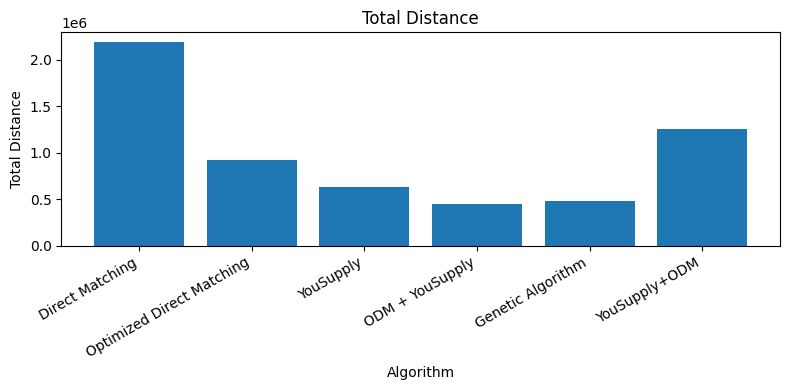

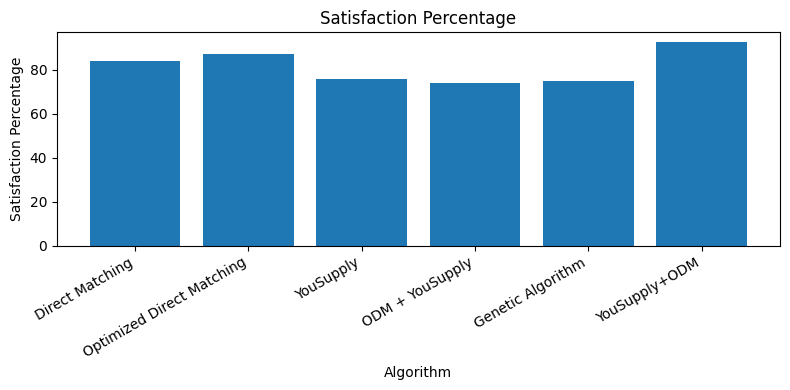

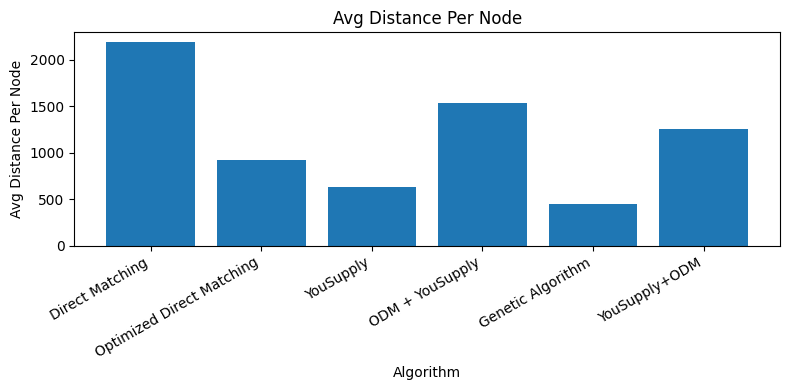

In [24]:
metrics = [
    "total_distance",
    "satisfaction_percentage",
    "avg_distance_per_node"
]

for metric in metrics:
    plt.figure(figsize=(8, 4))
    plt.bar(df["algorithm_name"], df[metric])
    plt.title(metric.replace("_", " ").title())
    plt.xlabel("Algorithm")
    plt.ylabel(metric.replace("_", " ").title())
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()